# NARX GP Grid Search

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, Product

from scipy.sparse import csr_matrix

from data import load_narx_data, load_data
from util_fun import calculate_error_nrms, use_NARX_model_in_simulation, plot_NRMS_Pred_vs_Sim

In [2]:
# Initialize stationary parameters

Split = [0.6, 0.2, 0.2] # split; [training, validation, test]
total_number_of_points = 5000 # total number of points to consider from the larger dataset (starting from index 0)

na_list=[*range(2,11)]
nb_list=[*range(2,10)]
restarts = 0

val_pred_NRMSs=np.ndarray((len(na_list),len(nb_list)))
val_sim_NRMSs=np.ndarray((len(na_list),len(nb_list)))

## Define your kernel here

In [3]:
kernel = RBF(length_scale_bounds=[1,30]) + WhiteKernel(noise_level_bounds=[1e-7,1e-1])
reg = GaussianProcessRegressor(kernel, n_restarts_optimizer=restarts)

In [4]:
#Load normal data
Xtrain,Ytrain = load_data(section="train", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xval,Yval = load_data(section="validation", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)

Using 3000 datapoints for training set


In [5]:
bestNRMSsim = float('inf')

In [6]:
for i, n_a in enumerate(na_list):
    for j, n_b in enumerate(nb_list):
        
        print(f"Currently running: na= {n_a}, nb= {n_b}")
        
        #Construct NARX data
        Xtrain_NARX,Ytrain_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="train", split=Split, as_tensor=False)
        Xval_NARX,Yval_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="validation", split=Split, as_tensor=False)
        

        #Convert to sparce matrices
        XtrainSparse = csr_matrix(Xtrain_NARX).toarray()
        YtrainSparse = csr_matrix(Ytrain_NARX).toarray().transpose()

        #Fit the GP
        reg.fit(XtrainSparse, YtrainSparse)
        
        #Initialize parameters for simulation
        fmodel = lambda u,y: reg.predict(np.concatenate([u,y])[None,:])[0] 
        
        #Prediction on validation set
        Yval_pred, Yval_pred_std = reg.predict(Xval_NARX,return_std=True)
        
        #Simulation on validation set
        Yval_sim = use_NARX_model_in_simulation(Xval, fmodel, n_a, n_b)
        
        
        #Store results
        val_pred_NRMSs[i,j] = calculate_error_nrms(Yval_pred, Yval_NARX)
        val_sim_NRMSs[i,j] = calculate_error_nrms(Yval_sim, Yval)

        print(f"NRMS for validation is: pred= {val_pred_NRMSs[i,j]:.2f}, sim= {val_sim_NRMSs[i,j]:.2f}")

        if val_sim_NRMSs[i,j] < bestNRMSsim:
            bestNRMSsim = val_sim_NRMSs[i,j]
            print(f"BEST NRMS currently is: na= {n_a}, nb= {n_b}")

Currently running: na= 2, nb= 2
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.8590012482884294, sim= 12.130058805471851
BEST NRMS currently is: na= 2, nb= 2
Currently running: na= 2, nb= 3
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.8591119085864488, sim= 12.558121771139144
BEST NRMS currently is: na= 2, nb= 3
Currently running: na= 2, nb= 4
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.8814104002113817, sim= 13.262972890333055
BEST NRMS currently is: na= 2, nb= 4
Currently running: na= 2, nb= 5
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.9191625535852288, sim= 13.673313335849935
BEST NRMS currently is: na= 2, nb= 5
Currently running: na= 2, nb= 6
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.949731448656432, sim= 14.504356753618769
BEST NRMS currently is: na= 2, nb= 6
Currently running: na= 2, nb= 7
Using 3000 datapoints for training set
NRMS for validation 

c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NRMS for validation is: pred= 0.708018656974483, sim= 6.553125528876446
BEST NRMS currently is: na= 5, nb= 3
Currently running: na= 5, nb= 4
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7106516822656165, sim= 7.441756240584767
BEST NRMS currently is: na= 5, nb= 4
Currently running: na= 5, nb= 5
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7315438850190804, sim= 8.421570840395674
BEST NRMS currently is: na= 5, nb= 5
Currently running: na= 5, nb= 6
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7454588100929564, sim= 9.2100171962105
BEST NRMS currently is: na= 5, nb= 6
Currently running: na= 5, nb= 7
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7753061899596111, sim= 10.154882493205688
BEST NRMS currently is: na= 5, nb= 7
Currently running: na= 5, nb= 8
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.8052958821670904, sim= 10.44508169305331
BEST NRMS currently is: 

c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NRMS for validation is: pred= 0.7179102939443421, sim= 7.918645863721922
BEST NRMS currently is: na= 7, nb= 2
Currently running: na= 7, nb= 3
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.6969524770451934, sim= 6.3441775575030395
BEST NRMS currently is: na= 7, nb= 3
Currently running: na= 7, nb= 4
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.698166559849993, sim= 6.722330697347556
BEST NRMS currently is: na= 7, nb= 4
Currently running: na= 7, nb= 5
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7233475372786109, sim= 6.7844757006174845
BEST NRMS currently is: na= 7, nb= 5
Currently running: na= 7, nb= 6
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NRMS for validation is: pred= 0.7319089068904563, sim= 7.7480567628761685
BEST NRMS currently is: na= 7, nb= 6
Currently running: na= 7, nb= 7
Using 3000 datapoints for training set


c:\Users\20191695\Anaconda3\envs\ml4sc\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


NRMS for validation is: pred= 0.7598254553793106, sim= 9.458524399640343
BEST NRMS currently is: na= 7, nb= 7
Currently running: na= 7, nb= 8
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7848647604821792, sim= 10.065827498610759
BEST NRMS currently is: na= 7, nb= 8
Currently running: na= 7, nb= 9
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.8113746540992678, sim= 11.398110136169807
BEST NRMS currently is: na= 7, nb= 9
Currently running: na= 8, nb= 2
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.7169664235260411, sim= 7.74939520402388
BEST NRMS currently is: na= 8, nb= 2
Currently running: na= 8, nb= 3
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.6929288709239905, sim= 6.326629958018897
BEST NRMS currently is: na= 8, nb= 3
Currently running: na= 8, nb= 4
Using 3000 datapoints for training set
NRMS for validation is: pred= 0.6947466832738077, sim= 6.722520320646666
BEST NRMS currently i

# Validation data

c:\Users\20191695\Desktop\TUe\Master\Year1\Q4\5SC28\5SC28\util_fun.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([0]+na_list)
c:\Users\20191695\Desktop\TUe\Master\Year1\Q4\5SC28\5SC28\util_fun.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0]+na_list)


Best parameters by prediction NRMS: na= 8, nb= 3
Best parameters by simulation NRMS: na= 6, nb= 3


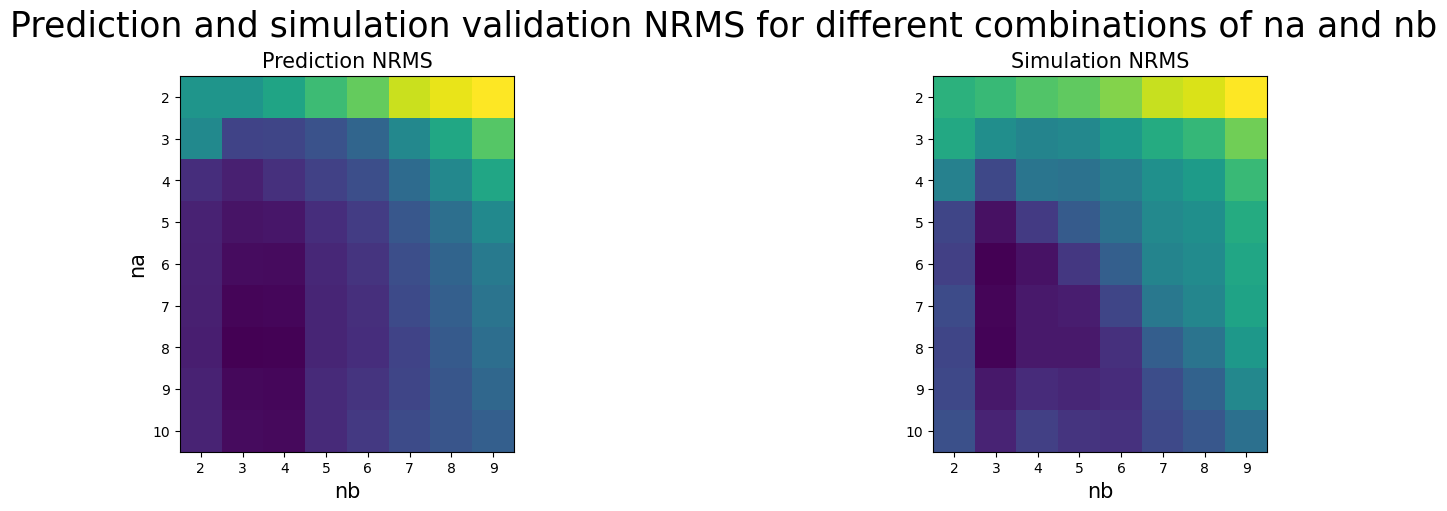

In [7]:
best_na_nb_val_pred, best_na_nb_val_sim = plot_NRMS_Pred_vs_Sim(val_pred_NRMSs, val_sim_NRMSs, na_list, nb_list)

In [8]:
print(f"Best val prediction NRMS found: {val_pred_NRMSs.min()}")
print(f"Best val simulation NRMS found: {val_sim_NRMSs.min()}")

Best val prediction NRMS found: 0.6929288709239905
Best val simulation NRMS found: 6.257302430383503


## Find the test NRMS for the test dataset

In [21]:
n_a, n_b = 6,3
total_number_of_points = 5000

# Load normal data
Xtrain,Ytrain = load_data(section="train", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xval,Yval = load_data(section="validation", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)
Xtest,Ytest = load_data(section="test", split=Split, total_number_of_points=total_number_of_points, as_tensor=False)

#Construct NARX data
Xtrain_NARX,Ytrain_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="train", split=Split, as_tensor=False)
Xval_NARX,Yval_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="validation", split=Split, as_tensor=False)
Xtest_NARX,Ytest_NARX = load_narx_data(n_a, n_b, total_number_of_points, section="test", split=Split, as_tensor=False)

#Convert to sparce matrices
XtrainSparse = csr_matrix(Xtrain_NARX).toarray()
YtrainSparse = csr_matrix(Ytrain_NARX).toarray().transpose()

#Fit the GP
reg.fit(XtrainSparse, YtrainSparse)

#Initialize parameters for simulation
fmodel = lambda u,y: reg.predict(np.concatenate([u,y])[None,:])[0] 

#Prediction on training set
Ytrain_pred, Ytrain_pred_std = reg.predict(Xtrain_NARX,return_std=True)
#Simulation on training set
Ytrain_sim = use_NARX_model_in_simulation(Xtrain, fmodel, n_a, n_b)

#Prediction on validation set
Yval_pred, Yval_pred_std = reg.predict(Xval_NARX,return_std=True)
#Simulation on validation set
Yval_sim = use_NARX_model_in_simulation(Xval, fmodel, n_a, n_b)

#Prediction on test set
Ytest_pred, Ytest_pred_std = reg.predict(Xtest_NARX,return_std=True)
#Simulation on test set
Ytest_sim = use_NARX_model_in_simulation(Xtest, fmodel, n_a, n_b)


Using 3000 datapoints for training set
Using 3000 datapoints for training set


In [22]:
NRMS_train_pred = calculate_error_nrms(Ytrain_pred, Ytrain_NARX)
print(f'Train prediction NRMS: {NRMS_train_pred:.2f} %')

NRMS_train_sim = calculate_error_nrms(Ytrain_sim, Ytrain)
print(f'Train simulation NRMS: {NRMS_train_sim:.2f} %')

NRMS_val_pred = calculate_error_nrms(Yval_pred, Yval_NARX)
print(f'Validation prediction NRMS: {NRMS_val_pred:.2f} %')

NRMS_val_sim = calculate_error_nrms(Yval_sim, Yval)
print(f'Validation simulation NRMS: {NRMS_val_sim:.2f} %')

NRMS_test_pred = calculate_error_nrms(Ytest_pred, Ytest_NARX)
print(f'Test prediction NRMS: {NRMS_test_pred:.2f} %')

NRMS_test_sim = calculate_error_nrms(Ytest_sim, Ytest)
print(f'Test simulation NRMS: {NRMS_test_sim:.2f} %')

Train prediction NRMS: 0.74 %
Train simulation NRMS: 5.82 %
Validation prediction NRMS: 0.70 %
Validation simulation NRMS: 6.26 %
Test prediction NRMS: 0.78 %
Test simulation NRMS: 20.42 %


In [23]:
data = {
    'Prediction': [NRMS_train_pred, NRMS_val_pred, NRMS_test_pred],
    'Simulation': [NRMS_train_sim, NRMS_val_sim, NRMS_test_sim]
}
    
index = ['Train', 'Validation', 'Test']

df = pd.DataFrame(data, index=index)

df = df.round(2)

display(df)


,Prediction,Simulation
Train,0.74,5.82
Validation,0.70,6.26
Test,0.78,20.42
